In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_excel("results.xlsx", header=[0,1], index_col=0)
df.sample(3)

Graph              Exhaustive            \
                        name    n      m #operations exec_time   
265                 gset/G14  800   4694         NaN       NaN   
259  graphs/0500_750.graphml  500  93562         NaN       NaN   
149  graphs/0041_250.graphml   41    205         NaN       NaN   

                        Heuristic                             greedy_prec  
    #solutions tested #operations exec_time #solutions tested              
265               NaN     6226078  0.126891                 1    0.789491  
259               NaN     2184238  0.068391                 1         NaN  
149               NaN        8688  0.000323                 1         NaN

# pop mean of greedy prec

used mean +- z_value * sample_std / sqrt(len obs)

In [9]:
observations = df[("greedy_prec", " ")]

# Sample mean
sample_mean = observations.mean()

# Sample standard deviation
sample_std = observations.std()

# Sample size

# Calculate the 95% confidence interval
confidence_level = 0.95
z_value =stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_value * (sample_std / np.sqrt(n))

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

sample_mean, (ci_lower, ci_upper), len(observations[observations.notnull()]) # intervalo fechado

(np.float64(0.7875003385601443),
 (np.float64(0.7630864792688177), np.float64(0.811914197851471)),
 153)

---

heuristica, best fit para tempo

a * x ** 2 * np.log2(x) [1.85901534e-08]

NMAE (%) hugo: 8.376400389731693

$\ $

exuastiva, best fit para tempo

2**(x - a) * (x)**2 [24.34775728]

NMAE (%) hugo: 2.484738758172613

# graficos

## numero ops

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1586/2210663319.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}' for label in ax.get_yticks()])


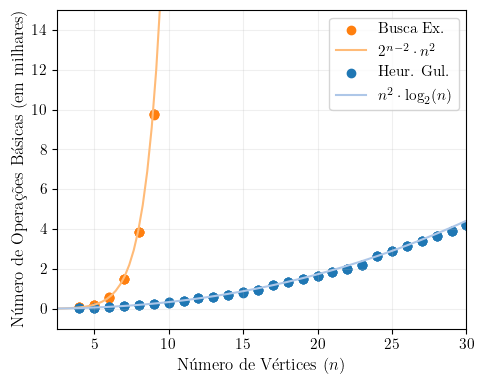

In [14]:
n = df[("Graph", "n")]
ops_heuristic = df[("Heuristic", "#operations")]
ops_exhaustive= df[("Exhaustive", "#operations")]


plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
})

fig, ax = plt.subplots()

x1 = np.linspace(0.1, 30, 100)
x2 = np.linspace(0.1, 30, 100)
yE = x2**2 * 2**(x2-2)
yH = x1**2 * np.log2(x1)
plt.scatter(n, ops_exhaustive, c="#ff7f0e", label="Busca Ex.")
plt.plot(x2, yE, label=r"$2^{n-2} \cdot n^2$", c="#ffbb78") #-2 pq é o 2^n/2 * 2^n/2 q dá 2^n/4 = 2^n-4 , e como sobe muito rapido...
plt.scatter(n, ops_heuristic, c="#1f77b4", label="Heur. Gul.")
plt.plot(x1, yH, label=r"$n^2 \cdot \log_2(n)$", c="#aec7e8") # heuristico
plt.ylim(-1000,15000)
plt.grid(True, alpha=0.2)
plt.xlim(2.5,30)
ax.legend(loc="best")
ax.set_yticklabels([f'{int(label/1000)}' for label in ax.get_yticks()])
plt.xlabel(r"Número de Vértices ($n$)")
plt.ylabel(r"Número de Operações Básicas (em milhares)")
plt.tight_layout()
plt.savefig("assets/numberOPS.png", format="png", dpi=900, bbox_inches="tight", transparent=True)

plt.show()

## tempo de execucao

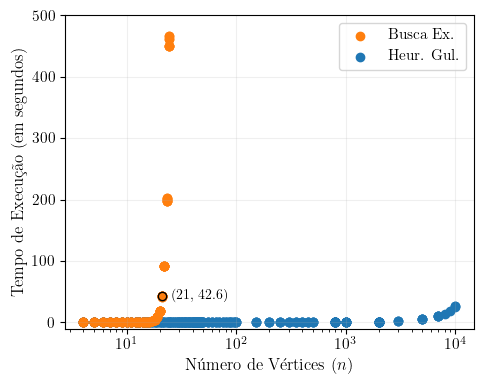

In [16]:
n = df[("Graph", "n")]
ops_heuristic = df[("Heuristic", "exec_time")]
ops_exhaustive= df[("Exhaustive", "exec_time")]



plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
})


fig, ax = plt.subplots()
plt.scatter(n, ops_exhaustive, c="#ff7f0e", label="Busca Ex.", alpha=1)
plt.scatter(n, ops_heuristic, c="#1f77b4", label="Heur. Gul.", alpha=1)
plt.scatter(n, ops_exhaustive, c="#ff7f0e")
plt.scatter(n[68], ops_exhaustive[68], c="#ff7f0e", edgecolor='black')
plt.ylim(-10,500)
plt.grid(True, alpha=0.2)
plt.legend()
plt.xlabel(r"Número de Vértices ($n$)")
plt.xscale('log')
plt.ylabel(r"Tempo de Execução (em segundos)")
plt.text(n[68]+65, ops_exhaustive[68]-5, 
         f'({n[68]:.0f}, {ops_exhaustive[68]:.1f})', 
         fontsize=10, 
         ha='right', 
         color='black') 

plt.tight_layout()
plt.savefig("assets/execTIME.png", format="png", dpi=900, bbox_inches="tight", transparent=True)

plt.show()

## solucoes testadas

In [5]:
#ve se perfeitamente q é 2^n e 1......

---

prever tempo de grafos mt maiores

/opt/anaconda3/envs/AA/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/AA/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1586/2517836492.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  params_exp, _ = curve_fit(exponential, x, y)
/opt/anaconda3/envs/AA/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1586/2517836492.py:20: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


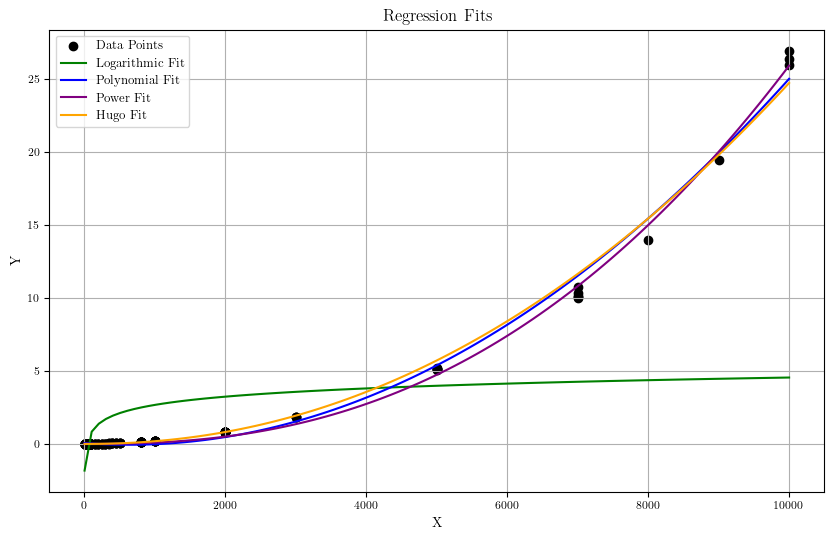

a * x**2 + b * x + c :  [ 2.85997568e-07 -3.67256390e-04  6.06740339e-02]
a * x ** 2 * np.log2(x) [1.85901534e-08]


In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the model function



# Define the model function
# Example data points
x_data = df[("Graph", "n")]
y_data = df[("Heuristic", "exec_time")]
valid_indices = ~np.isnan(y_data)  # Get indices where y_data is not NaN
x = x_data[valid_indices]  # Cleaned x_data
y = y_data[valid_indices] 


# Define the regression functions
def exponential(x, a, b):
    return a * np.exp(b * x)

def logarithmic(x, a, b):
    return a * np.log(b * x)

def polynomial(x, a, b, c):
    return a * x**2 + b * x + c  # 2nd degree polynomial

def power(x, a, b):
    return a * x ** b

def hugo(x, a):
    return a * x ** 2 * np.log2(x)

# Fit the models
params_exp, _ = curve_fit(exponential, x, y)
params_log, _ = curve_fit(logarithmic, x, y)
params_poly, _ = curve_fit(polynomial, x, y)
params_power, _ = curve_fit(power, x, y)
params_hugo, _ = curve_fit(hugo, x, y)

# Generate fitted data
x_fit = np.linspace(min(x), max(x), 100)
y_fit_exp = exponential(x_fit, *params_exp)
y_fit_log = logarithmic(x_fit, *params_log)
y_fit_poly = polynomial(x_fit, *params_poly)
y_fit_power = power(x_fit, *params_power)
y_fit_hugo = hugo(x_fit, *params_hugo)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', color='black')
#plt.plot(x_fit, y_fit_exp, label='Exponential Fit', color='red')
plt.plot(x_fit, y_fit_log, label='Logarithmic Fit', color='green')
plt.plot(x_fit, y_fit_poly, label='Polynomial Fit', color='blue')
plt.plot(x_fit, y_fit_power, label='Power Fit', color='purple')
plt.plot(x_fit, y_fit_hugo, label='Hugo Fit', color='orange')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Fits')
plt.grid(True)
plt.show()

print("a * x**2 + b * x + c : ", params_poly)
print("a * x ** 2 * np.log2(x)", params_hugo)


In [7]:
import numpy as np

# Valores reais e previstos
y_true = y
y_pred = hugo(x, *params_hugo)
y_predP = polynomial(x, *params_poly)

# Valor pequeno para evitar divisões por zero
epsilon = 1e-6
nmae_hugo = np.mean(np.abs(y_true - y_pred)) / (np.mean(np.abs(y_true)) + epsilon) * 100
nmae_ply = np.mean(np.abs(y_true - y_predP)) / (np.mean(np.abs(y_true)) + epsilon) * 100
nmae_plys = np.mean(np.abs(y_true - power(x, *params_power))) / (np.mean(np.abs(y_true)) + epsilon) * 100

# Resultados
print("NMAE (%) hugo:", nmae_hugo)
print("NMAE (%) ploy:", nmae_ply)
print("NMAE (%) power:", nmae_plys)

NMAE (%) hugo: 8.376400389731693
NMAE (%) ploy: 18.62428474437557
NMAE (%) power: 9.02182532912177


/opt/anaconda3/envs/AA/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1586/3354855287.py:51: OptimizeWarning: Covariance of the parameters could not be estimated
  params_power, _ = curve_fit(power, x, y)
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1586/3354855287.py:53: OptimizeWarning: Covariance of the parameters could not be estimated
  params_hugo2, _ = curve_fit(hugo2, x, y)
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1586/3354855287.py:54: OptimizeWarning: Covariance of the parameters could not be estimated
  params_hugo3, _ = curve_fit(hugo3, x, y)
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1586/3354855287.py:55: OptimizeWarning: Covariance of the parameters could not be estimated
  params_hugo4, _ = curve_fit(hugo4, x, y)


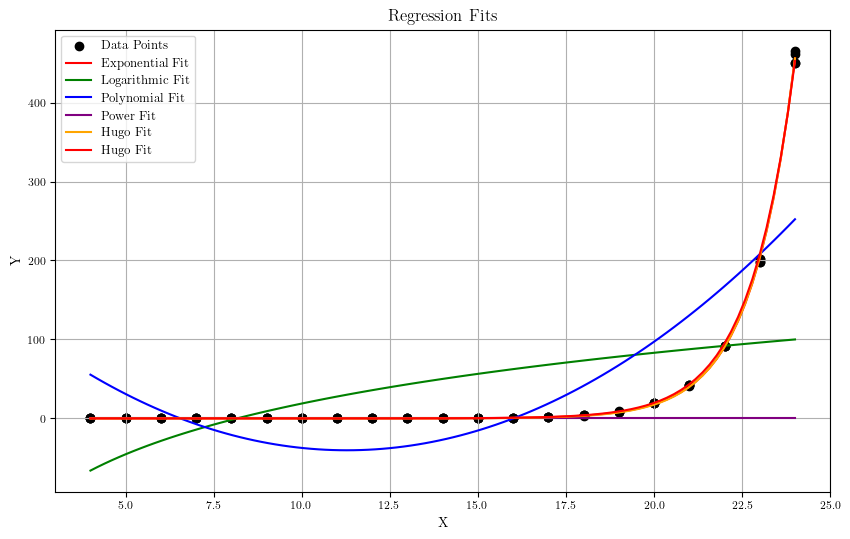

2**(x - a) * (x - b)**2 [23.55084878  5.72474595]
2**(x - a) * (x)**2 [24.34775728  1.        ]


In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the model function



# Define the model function
# Example data points
x_data = df[("Graph", "n")]
y_data = df[("Exhaustive", "exec_time")]
valid_indices = ~np.isnan(y_data)  # Get indices where y_data is not NaN
x = x_data[valid_indices]  # Cleaned x_data
y = y_data[valid_indices] 


# Define the regression functions
def exponential(x, a, b):
    return a * np.exp(b * x)

def logarithmic(x, a, b):
    return a * np.log(b * x)

def polynomial(x, a, b, c):
    return a * x**2 + b * x + c  # 2nd degree polynomial

def power(x, a, b):
    return x*0

def hugo1(x, a, b, c):
    return 2**(x - a) * (x - b)**2 * c
def hugo2(x, a, b, c):
    return 2**(x) * (x - b)**2 * c
def hugo3(x, a, b, c):
    return 2**(x -a ) * (x - b)**2
def hugo4(x, a, b, c):
    return 2**(x) * (x)**2 * c

def hugo1(x, a, b):
    return 2**(x - a) * (x - b)**2
def hugo2(x, a, b):
    return 2**(x) * (x - b)**2
def hugo3(x, a, b):
    return 2**(x - a) * (x)**2

# Fit the models
params_exp, _ = curve_fit(exponential, x, y)
params_log, _ = curve_fit(logarithmic, x, y)
params_poly, _ = curve_fit(polynomial, x, y)
params_power, _ = curve_fit(power, x, y)
params_hugo1, _ = curve_fit(hugo1, x, y)
params_hugo2, _ = curve_fit(hugo2, x, y)
params_hugo3, _ = curve_fit(hugo3, x, y)
params_hugo4, _ = curve_fit(hugo4, x, y)

# Generate fitted data
x_fit = np.linspace(min(x), max(x), 100)
y_fit_exp = exponential(x_fit, *params_exp)
y_fit_log = logarithmic(x_fit, *params_log)
y_fit_poly = polynomial(x_fit, *params_poly)
y_fit_power = power(x_fit, *params_power)
y_fit_hugo1 = hugo1(x_fit, *params_hugo1)
y_fit_hugo3 = hugo3(x_fit, *params_hugo3)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', color='black')
plt.plot(x_fit, y_fit_exp, label='Exponential Fit', color='red')
plt.plot(x_fit, y_fit_log, label='Logarithmic Fit', color='green')
plt.plot(x_fit, y_fit_poly, label='Polynomial Fit', color='blue')
plt.plot(x_fit, y_fit_power, label='Power Fit', color='purple')
plt.plot(x_fit, y_fit_hugo1, label='Hugo Fit', color='orange')
plt.plot(x_fit, y_fit_hugo3, label='Hugo Fit', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Fits')
plt.grid(True)
plt.show()

print("2**(x - a) * (x - b)**2", params_hugo1)
print("2**(x - a) * (x)**2", params_hugo3)

In [9]:
import numpy as np

# Valores reais e previstos
y_true = y
y_pred1 = hugo1(x, *params_hugo1)
y_pred2 = hugo2(x, *params_hugo2)
y_pred3 = hugo3(x, *params_hugo3)
y_pred4 = hugo4(x, *params_hugo4)

# Valor pequeno para evitar divisões por zero
epsilon = 1e-6
nmae_hugo1 = np.mean(np.abs(y_true - y_pred1)) / (np.mean(np.abs(y_true)) + epsilon) * 100
nmae_hugo2 = np.mean(np.abs(y_true - y_pred2)) / (np.mean(np.abs(y_true)) + epsilon) * 100
nmae_hugo3 = np.mean(np.abs(y_true - y_pred3)) / (np.mean(np.abs(y_true)) + epsilon) * 100
#nmae_hugo4 = np.mean(np.abs(y_true - y_pred4)) / (np.mean(np.abs(y_true)) + epsilon) * 100

# Resultados
print("NMAE (%) hugo:", nmae_hugo1)
#print("NMAE (%) hugo:", nmae_hugo2)
print("NMAE (%) hugo:", nmae_hugo3)
#print("NMAE (%) hugo:", nmae_hugo4)

NMAE (%) hugo: 2.2285099671286246
NMAE (%) hugo: 2.484738758172613
